In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv('train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data  = np.array(data)
m,n = data.shape
np.random.shuffle(data)


In [5]:
data.shape

(42000, 785)

In [6]:

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [7]:
Y_train

array([4, 2, 6, ..., 6, 7, 3], dtype=int64)

The weights W1 have a shape of (10, 784), indicating 10 neurons in the hidden layer and 784 input features.
The biases b1 have a shape of (10, 1), corresponding to the 10 neurons in the hidden layer.
The network architecture can be summarized as follows:

Input layer: 784 neurons (assuming the input data has 784 features)
Hidden layer: 10 neurons
Output layer: 10 neurons (as indicated by W2 having a shape of (10, 10))

In [8]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [9]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [10]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)
#training accuracy


Iteration:  0
[6 4 6 ... 5 5 4] [4 2 6 ... 6 7 3]
0.07185365853658536
Iteration:  10
[5 6 3 ... 2 7 3] [4 2 6 ... 6 7 3]
0.18978048780487805
Iteration:  20
[7 6 3 ... 2 7 3] [4 2 6 ... 6 7 3]
0.27846341463414637
Iteration:  30
[7 3 6 ... 2 7 3] [4 2 6 ... 6 7 3]
0.3626829268292683
Iteration:  40
[7 3 6 ... 2 7 3] [4 2 6 ... 6 7 3]
0.4356829268292683
Iteration:  50
[4 3 6 ... 4 7 3] [4 2 6 ... 6 7 3]
0.48873170731707316
Iteration:  60
[4 3 6 ... 4 7 3] [4 2 6 ... 6 7 3]
0.5302682926829269
Iteration:  70
[4 3 6 ... 4 7 3] [4 2 6 ... 6 7 3]
0.5639024390243902
Iteration:  80
[4 3 6 ... 4 7 3] [4 2 6 ... 6 7 3]
0.5916585365853658
Iteration:  90
[4 3 6 ... 4 7 3] [4 2 6 ... 6 7 3]
0.617390243902439
Iteration:  100
[4 3 6 ... 6 7 3] [4 2 6 ... 6 7 3]
0.6384146341463415
Iteration:  110
[4 2 6 ... 6 7 3] [4 2 6 ... 6 7 3]
0.656390243902439
Iteration:  120
[4 2 6 ... 6 7 3] [4 2 6 ... 6 7 3]
0.6737317073170732
Iteration:  130
[4 2 6 ... 6 7 3] [4 2 6 ... 6 7 3]
0.6897560975609756
Iteration:  140

In [11]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  4


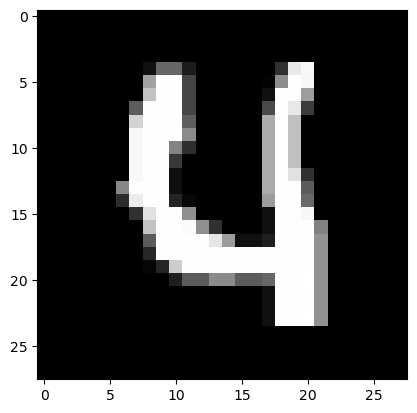

Prediction:  [2]
Label:  2


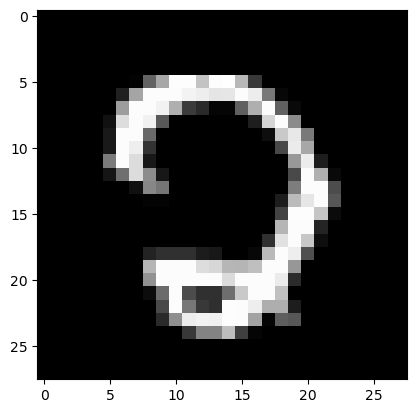

Prediction:  [6]
Label:  6


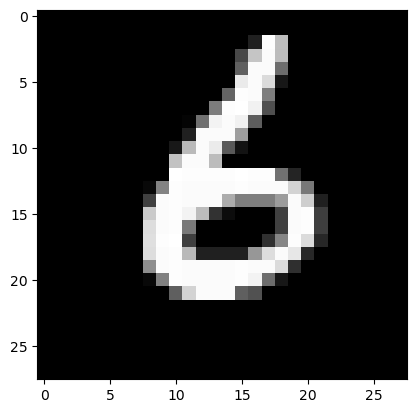

Prediction:  [8]
Label:  2


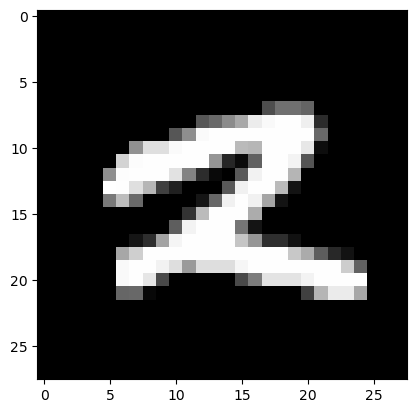

In [12]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)